In [2]:
# Setup

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# get data online, create dir housing within dataset and then safe as tgz. 
# extract

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
# open csv w pandas

import pandas as pd

def load_housing_data(housing_path= HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
# save data in 'housing' and show first 5 rows
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Exploration

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualization 

Saving figure attribute_histogram_plots


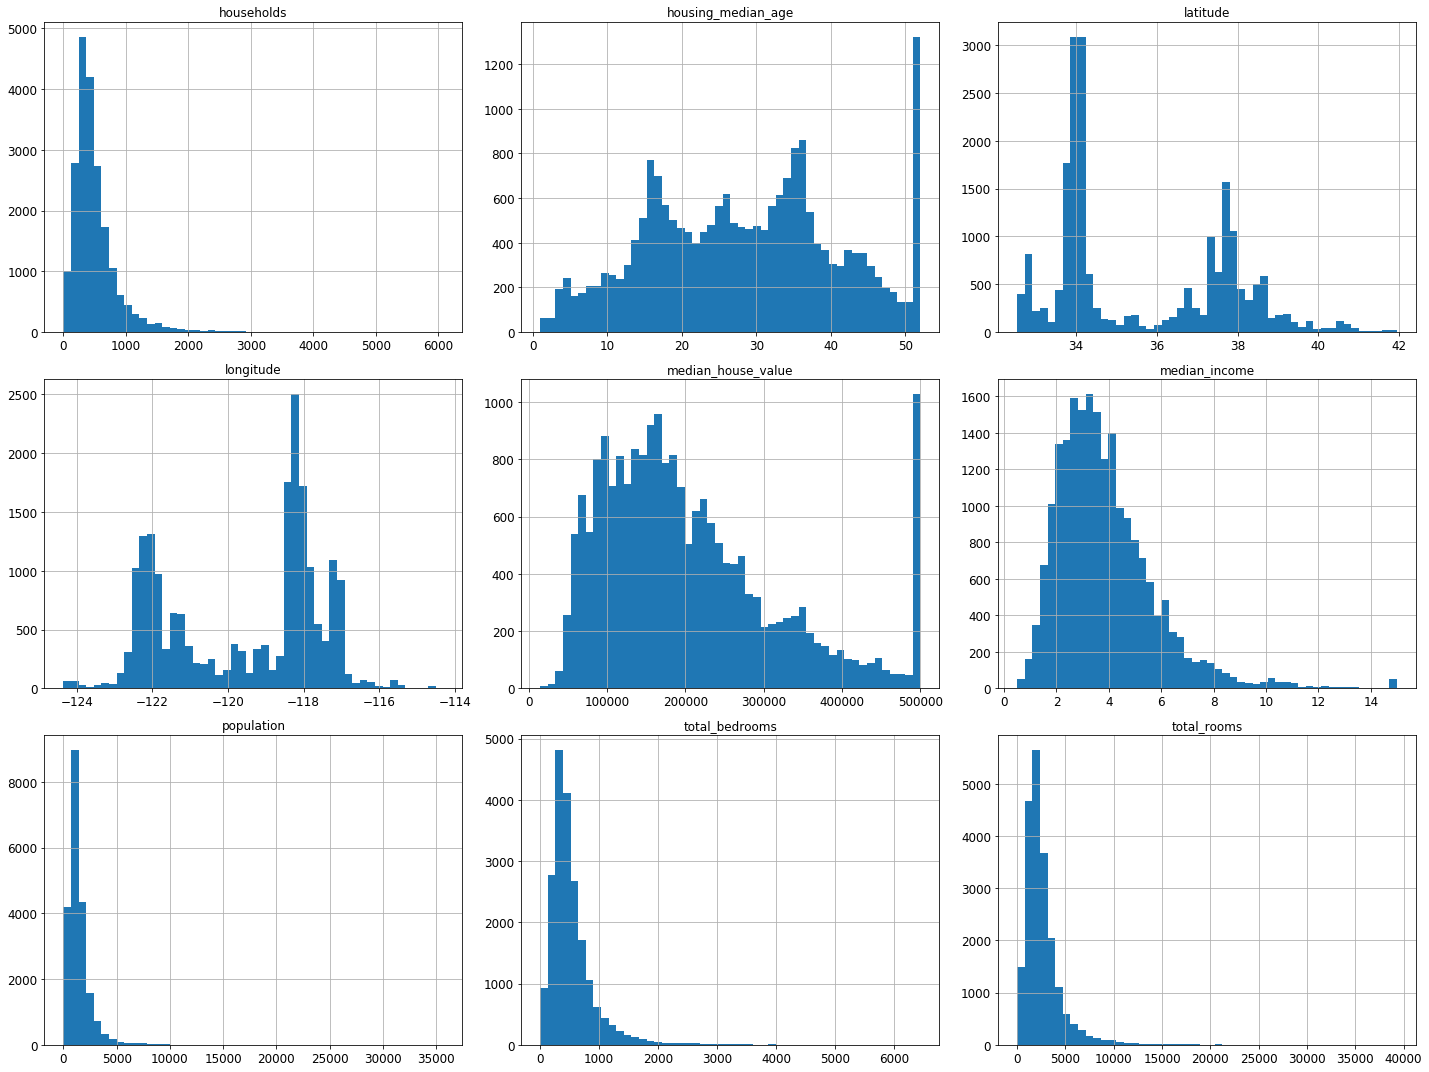

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
save_fig('attribute_histogram_plots')
plt.show()


In [12]:
# to make this notebook's output identical / reproducable every time

np.random.seed(42)

## Create Test Set

1. Using own functions (inlcuding hashlib, zlib)
2. Scikit learn function 

In [13]:
# 2.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, random_state=42, test_size=0.2)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

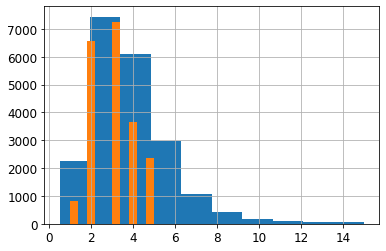

In [15]:
# Clean Data

# 1. Tail Heavy (like median_income)
housing['median_income'].hist()

# create new column with income categories

housing['income_cat'] = pd.cut(housing['median_income'],
                              bins= [0.,1.5,3.0,4.5, 6.0, np.inf],
                              labels = [1,2,3,4,5])

housing['income_cat'].hist()
housing['income_cat'].value_counts()

In [21]:
# Stratifie the data 
# sampling error: unequal samples 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# this was used to show the distrib. of samples within the income cat column


In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    

## 3. Discover and Visualize
3.1 Visualize
3.2
3.3

In [23]:
housing = strat_train_set.copy()

### 3.1 Visualize Geopgr. Data


Saving figure Sven_housing_prices_scatterplot


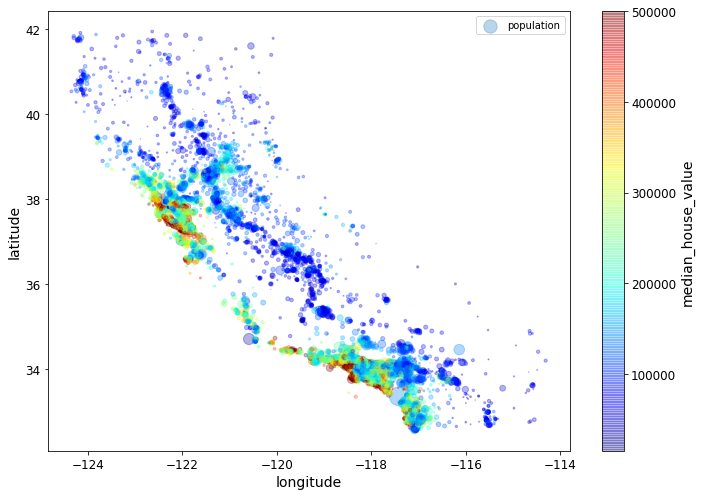

In [30]:

housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7),
            s=housing['population']/100, label='population', alpha=0.3,
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()
save_fig("Sven_housing_prices_scatterplot")

Saving figure Sven_california_housing_prices_plot


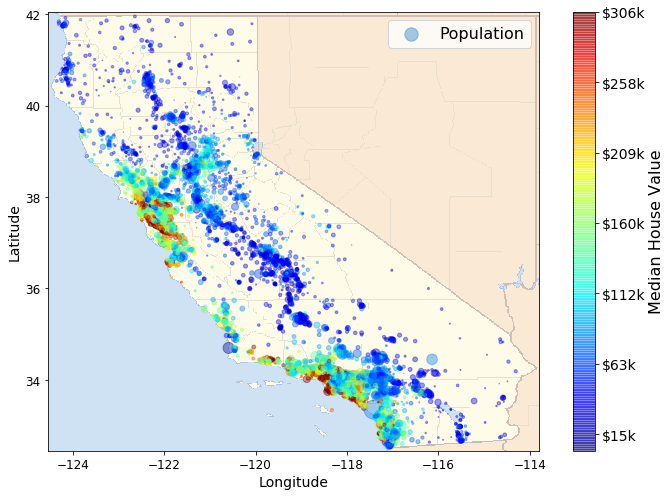

In [33]:
import matplotlib.image as mpimg

# plot housing data
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )

# get Cali image
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')

# plotting Cali img
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# adjust colorbar with prices in $

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("Sven_california_housing_prices_plot")
plt.show()


In [ ]:
### 3.2 Look for Correlations

In [34]:
corr_matrix = housing.corr()

# inspect correlations for 'Median House Value'

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


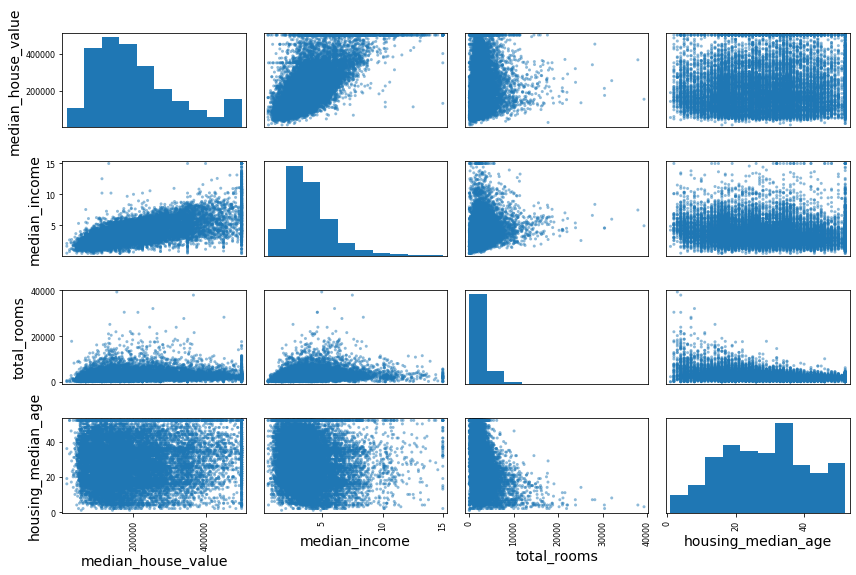

In [35]:
# visualize correlations with pands.tooling scatter_matrix

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("Sven_scatter_matrix_plot")

In [36]:
### 3.3 Experiment with Attribute Combos


In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [39]:
# again calculate correlation with new attributes

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

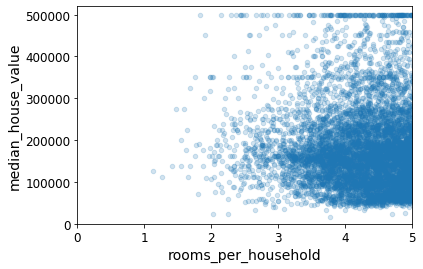

In [40]:
# rooms_per_household higher correlation than just total_rooms

housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

## 4. Prepare 

1. Data Cleaning
2. Handling Text and Categorical Attributes
3. Custom Transformers
4. Feature Scaling
5. Transformation Pipeline

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### 4.1 Data Cleaning

Handling missing values

In [43]:
# Option 1: .dropna(subset=['column'])
# Option 2: .drop('columnname', axis=1)
# Option 3:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)

In [ ]:
# scikit learn provides class 'Imputer' to handle missing values

In [46]:
try:
    from sklearn.impute import SimpleImputer
except:
    from slearn.preprocessing import SimpleImputer
    
# specify that each missing values should be replaced by median  
imputer = SimpleImputer(strategy="median")

# imputer only on numerical - drop text attribute
housing_num = housing.drop('ocean_proximity', axis=1)

# use imputer

imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
# same as manually

housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [50]:
# transform the data

X = imputer.transform(housing_num)

# create df

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

# check rows with missing values 
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,5.000000,5.000000,5.000000,5.00000,5.0,5.000000,5.000000,5.000000
mean,-119.644000,35.592000,15.400000,3867.60000,433.0,2368.000000,874.200000,3.382700
std,2.539238,2.158013,9.736529,2000.27968,0.0,1241.016317,529.326648,1.500375
min,-122.790000,34.010000,6.000000,1955.00000,433.0,999.000000,386.000000,1.667500
25%,-121.970000,34.050000,7.000000,2155.00000,433.0,1039.000000,391.000000,2.270800
50%,-118.300000,34.070000,16.000000,3759.00000,433.0,3038.000000,727.000000,3.166200
75%,-117.860000,37.350000,18.000000,4632.00000,433.0,3296.000000,1405.000000,4.632800
max,-117.300000,38.480000,30.000000,6837.00000,433.0,3468.000000,1462.000000,5.176200


In [51]:
imputer.strategy

'median'

 ### 4.2 handling text and categorical data

In [53]:
# df with cat. values (only Ocean Proximity column)

housing_cat = housing[['ocean_proximity']]

# transform to numerical values
try:
    from sklearn.preprocessing import OrdinalEncoder
except:
    from future_encoders import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [54]:

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# creates  a sparse matrix - .toarray() to dense array or set OneHotEncoder(saprse=False)

In [55]:
# create custom transformer to add extra attributes

housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [63]:
# Option 1:
'''
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

'''

'\nfrom sklearn.base import BaseEstimator, TransformerMixin\n\n# get the right column indices: safer than hard-coding indices 3, 4, 5, 6\nrooms_ix, bedrooms_ix, population_ix, household_ix = [\n    list(housing.columns).index(col)\n    for col in ("total_rooms", "total_bedrooms", "population", "households")]\n\nclass CombinedAttributesAdder(BaseEstimator, TransformerMixin):\n    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs\n        self.add_bedrooms_per_room = add_bedrooms_per_room\n    def fit(self, X, y=None):\n        return self  # nothing else to do\n    def transform(self, X, y=None):\n        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]\n        population_per_household = X[:, population_ix] / X[:, household_ix]\n        if self.add_bedrooms_per_room:\n            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]\n            return np.c_[X, rooms_per_household, population_per_household,\n                         bedrooms_per_room]\n

In [64]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [61]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) +["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


#### Pipeline for preprocessing the NUMERICAL Attributes

(later the categ.)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [66]:
#### Full Pipeline with cat. Encoder

In [ ]:
from sklearn.compose import ColumnTransformer


num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## See old version with BaseEstimator, TransformerMixin and FeatureUnion in Solution by Geron